In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [126]:
train = 'dataset.csv'

test = 'validation_set.csv'

In [127]:
df = pd.read_csv(train, index_col=0)

In [102]:
df.head(), df.shape

(   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
 0     200000    2          3         1   30      2      2      2      2   
 1     200000    2          4         2   27     -2     -2     -2     -2   
 2      20000    2          2         2   28      0      0      2      0   
 3      50000    1          2         2   23      0      0      0     -1   
 4      20000    1          2         1   47     -1     -1     -1     -2   
 
    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
 0      2  ...     147273     149244     151973      6600      6000      5860   
 1     -2  ...          0          0          0         0         0         0   
 2      0  ...       8168       6894      11424      3353         3      5101   
 3      0  ...      48437      18712      19129      4175     41000     51705   
 4     -2  ...          0          0          0       780         0         0   
 
    PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next

In [103]:
df['default payment next month']

0        0
1        0
2        1
3        0
4        0
        ..
22495    0
22496    0
22497    0
22498    0
22499    0
Name: default payment next month, Length: 22500, dtype: int64

In [104]:
x = df.drop('default payment next month', axis=1)
y = df['default payment next month']

In [54]:
y.value_counts()

0    17523
1     4977
Name: default payment next month, dtype: int64

## Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

* LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

* SEX: Gender (1 = male; 2 = female).

* EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

* MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

* AGE: Age (year).

* PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
    * PAY_0 = the repayment status in September, 2005;
    * PAY_1 = the repayment status in August, 2005;
    * . . . ;
    * PAY_6 = the repayment status in April, 2005.
        * The measurement scale for the repayment status is:
            * -1 = pay duly;
            * 1 = payment delay for one month;
            * 2 = payment delay for two months;
            * . . . ;
            * 8 = payment delay for eight months;
            * 9 = payment delay for nine months and above.

* BILL_AMT1 - BILL_AMT6: Amount of bill statement (NT dollar).
    * BILL_AMT1 = amount of bill statement in September, 2005;
    * BILL_AMT2 = amount of bill statement in August, 2005;
    * . . . ;
    * BILL_AMT6 = amount of bill statement in April, 2005.

* PAY_AMT1 - PAY_AMT6: Amount of previous payment (NT dollar).
    * PAY_AMT1 = amount paid in September, 2005;
    * PAY_AMT1 = amount paid in August, 2005;
    * . . . ;
    * PAY_AMT6 = amount paid in April, 2005.

In [8]:
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,200000,2,3,1,30,2,2,2,2,2,...,145374,147273,149244,151973,6600,6000,5860,6000,5000,0
1,200000,2,4,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
2,20000,2,2,2,28,0,0,2,0,0,...,4144,8168,6894,11424,3353,3,5101,6,6530,8103
3,50000,1,2,2,23,0,0,0,-1,0,...,49724,48437,18712,19129,4175,41000,51705,700,718,700
4,20000,1,2,1,47,-1,-1,-1,-2,-2,...,0,0,0,0,780,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,50000,2,2,1,50,0,0,0,0,0,...,20691,17081,16234,16330,2000,1306,1206,1000,697,532
22496,80000,2,2,1,53,0,0,0,0,0,...,20475,20325,20276,20662,2530,3990,850,800,1100,1100
22497,50000,2,2,1,50,0,0,0,0,0,...,48999,49388,48853,47765,2070,2357,1746,1628,1520,2202
22498,220000,1,2,1,32,0,0,0,0,0,...,105226,107476,109746,111920,3746,3820,4000,4000,4000,4500


In [8]:
#replace all 0,5,6 with 4(others) on EDUCATION column
#x['EDUCATION'] = x['EDUCATION'].replace({5:4, 0:4, 6:4})

In [9]:
x['EDUCATION'].value_counts()

2    10546
1     7921
3     3690
5      205
4       90
6       35
0       13
Name: EDUCATION, dtype: int64

In [10]:
#replace all 0 with 3(others) on MARRIAGE column
#x['MARRIAGE'] = x['MARRIAGE'].replace({0:3})

In [11]:
x['MARRIAGE'].value_counts()

2    11942
1    10281
3      236
0       41
Name: MARRIAGE, dtype: int64

In [128]:
##make female 0
x['SEX'] = x['SEX'].replace({2:0})

In [14]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [15]:
#mapping the data, 1 for danger late level and 0 for still okay level

# x['PAY_0'] = np.where(x['PAY_0'].values > 0, 1,0)
# x['PAY_2'] = np.where(x['PAY_2'].values > 0, 1,0)
# x['PAY_3'] = np.where(x['PAY_3'].values > 0, 1,0)
# x['PAY_4'] = np.where(x['PAY_4'].values > 0, 1,0)
# x['PAY_5'] = np.where(x['PAY_5'].values > 0, 1,0)
# x['PAY_6'] = np.where(x['PAY_6'].values > 0, 1,0)

In [16]:
x['PAY_6'].value_counts().sort_values()

1     2297
0    20203
Name: PAY_6, dtype: int64

In [17]:
x[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',]]

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,1,1,1,1,1
1,0,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
22495,0,0,0,0,0,0
22496,0,0,0,0,0,0
22497,0,0,0,0,0,0
22498,0,0,0,0,0,0


In [71]:
#amt_late represents the amount of times you were in the danger late level across the months
x['amt_late'] = x['PAY_0'] + x['PAY_2'] + x['PAY_3'] + x['PAY_4'] + x['PAY_5'] + x['PAY_6']

In [13]:
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,200000,0,3,1,30,2,2,2,2,2,...,145374,147273,149244,151973,6600,6000,5860,6000,5000,0
1,200000,0,4,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
2,20000,0,2,2,28,0,0,2,0,0,...,4144,8168,6894,11424,3353,3,5101,6,6530,8103
3,50000,1,2,2,23,0,0,0,-1,0,...,49724,48437,18712,19129,4175,41000,51705,700,718,700
4,20000,1,2,1,47,-1,-1,-1,-2,-2,...,0,0,0,0,780,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,50000,0,2,1,50,0,0,0,0,0,...,20691,17081,16234,16330,2000,1306,1206,1000,697,532
22496,80000,0,2,1,53,0,0,0,0,0,...,20475,20325,20276,20662,2530,3990,850,800,1100,1100
22497,50000,0,2,1,50,0,0,0,0,0,...,48999,49388,48853,47765,2070,2357,1746,1628,1520,2202
22498,220000,1,2,1,32,0,0,0,0,0,...,105226,107476,109746,111920,3746,3820,4000,4000,4000,4500


In [129]:
x['FULL_1'] = (x['BILL_AMT1'] - x['PAY_AMT1'])#/ x['LIMIT_BAL']
x['FULL_2'] = (x['BILL_AMT2'] - x['PAY_AMT2'])#/ x['LIMIT_BAL']
x['FULL_3'] = (x['BILL_AMT3'] - x['PAY_AMT3'])#/ x['LIMIT_BAL']
x['FULL_4'] = (x['BILL_AMT4'] - x['PAY_AMT4'])#/ x['LIMIT_BAL']
x['FULL_5'] = (x['BILL_AMT5'] - x['PAY_AMT5'])#/ x['LIMIT_BAL']
x['FULL_6'] = (x['BILL_AMT6'] - x['PAY_AMT6'])#/ x['LIMIT_BAL']

In [56]:
x.drop(columns=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], inplace=True)

In [57]:
x.drop(columns=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], inplace=True)

In [15]:
x[['FULL_1','FULL_2','FULL_3','FULL_4','FULL_5','FULL_6',]]

,FULL_1,FULL_2,FULL_3,FULL_4,FULL_5,FULL_6
0,0.668635,0.685685,0.697570,0.706365,0.721220,0.759865
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.020800,0.284650,-0.047850,0.408100,0.018200,0.166050
3,0.941980,0.189480,-0.039620,0.954740,0.359880,0.368580
4,-0.019500,0.039000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
22495,0.399120,0.382660,0.389700,0.321620,0.310740,0.315960
22496,0.576975,1.223600,0.245312,0.244062,0.239700,0.244525
22497,0.982840,0.966020,0.945060,0.955200,0.946660,0.911260
22498,0.901200,0.451382,0.460118,0.470345,0.480664,0.488273


In [21]:
#mapping the data, 1 for not paid in full  and 0 for paid in full or more

# x['FULL_1'] = np.where(x['FULL_1'].values > 0, 1,0)
# x['FULL_2'] = np.where(x['FULL_2'].values > 0, 1,0)
# x['FULL_3'] = np.where(x['FULL_3'].values > 0, 1,0)
# x['FULL_4'] = np.where(x['FULL_4'].values > 0, 1,0)
# x['FULL_5'] = np.where(x['FULL_5'].values > 0, 1,0)
# x['FULL_6'] = np.where(x['FULL_6'].values > 0, 1,0)

In [22]:
x[['FULL_1','FULL_2','FULL_3','FULL_4','FULL_5','FULL_6',]]

,FULL_1,FULL_2,FULL_3,FULL_4,FULL_5,FULL_6
0,1,1,1,1,1,1
1,0,0,0,0,0,0
2,0,1,0,1,1,1
3,1,1,0,1,1,1
4,0,1,0,0,0,0
...,...,...,...,...,...,...
22495,1,1,1,1,1,1
22496,1,1,1,1,1,1
22497,1,1,1,1,1,1
22498,1,1,1,1,1,1


In [16]:
# x['PEND'] = x['FULL_1'] + x['FULL_2'] + x['FULL_3'] + x['FULL_4'] + x['FULL_5'] + x['FULL_6']

In [89]:
continuous = ['LIMIT_BAL', 'AGE', 'amt_late', 'PEND']
categorical = ['SEX', 'EDUCATION', 'MARRIAGE']

In [130]:
#dummies for categoricals
edu_dummies = pd.get_dummies(x['EDUCATION'], prefix='edu', drop_first=True)
mar_dummies = pd.get_dummies(x['MARRIAGE'], prefix='mar', drop_first=True)

In [131]:
x_cat = pd.concat([x[['SEX']], edu_dummies, mar_dummies], axis=1)

In [27]:
#x_cont = x[continuous]

In [132]:
x.drop(columns=['EDUCATION', 'MARRIAGE', 'SEX'], axis=1, inplace=True)

In [ ]:
#x['PAY_0'] + x['PAY_2'] + x['PAY_3'] + x['PAY_4'] + x['PAY_5'] + x['PAY_6']

In [40]:
x.drop(columns=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5'], inplace=True)

In [133]:
from sklearn.preprocessing import StandardScaler

# Scale the cont train data
ss = StandardScaler()
x_cont = ss.fit_transform(x)
x_cont = pd.DataFrame(x)
#x_cont.columns = continuous

In [134]:
X_train_all = pd.concat([x, x_cat], axis=1)

Model time!!!

In [135]:
X = X_train_all

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

Using RandomForest & GridSearch

In [24]:
# Import Grid search
from sklearn.model_selection import GridSearchCV

In [25]:
#     n_estimators = number of trees in the foreset
#     max_features = max number of features considered for splitting a node
#     max_depth = max number of levels in each decision tree
#     min_samples_split = min number of data points placed in a node before the node is split
#     min_samples_leaf = min number of data points allowed in a leaf node
#     bootstrap = method for sampling data points (with or without replacement)

In [31]:
p={'max_depth': [5,8,10,12,15,20],
   'min_samples_leaf': [1,2,4],
   'min_samples_split': [2,3,4],
   'max_features' : ['auto', 'sqrt']
   }

In [32]:

rfc = RandomForestClassifier(random_state = 23,
                             n_estimators = 100,
                             class_weight='balanced')

In [33]:
grid_tree=GridSearchCV(rfc,p, cv=10, scoring='f1')


In [34]:
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=23,
                           

In [35]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.5341751656461189
{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)


In [36]:
from sklearn import metrics 
#Predict the response for test dataset
y_predgs = grid_tree.best_estimator_.predict(X_test)
y_predtrain = grid_tree.best_estimator_.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print('Training Precision: ', precision_score(y_train, y_predtrain))
print('Testing Precision: ', precision_score(y_test, y_predgs))
print('\n')

print('Training Recall: ', recall_score(y_train, y_predtrain))
print('Testing Recall: ', recall_score(y_test, y_predgs))
print('\n')

print('Training Accuracy: ', accuracy_score(y_train, y_predtrain))
print('Testing Accuracy: ', accuracy_score(y_test, y_predgs))
print('\n')

print('Training F1-Score: ', f1_score(y_train, y_predtrain))
print('Testing F1-Score: ', f1_score(y_test, y_predgs))

Training Precision:  0.567068843151171
Testing Precision:  0.4996572995202193


Training Recall:  0.6431446203380735
Testing Recall:  0.5832


Training Accuracy:  0.8127407407407408
Testing Accuracy:  0.7776


Training F1-Score:  0.6027156147850138
Testing F1-Score:  0.5382059800664452


Non Gridsearch version

In [137]:
rfc2 = RandomForestClassifier(random_state = 23,
                             n_estimators = 100,
                             class_weight='balanced',
                             max_depth = 8,
                             min_samples_leaf = 2,
                             min_samples_split = 2)

In [138]:
rfc2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)

In [139]:
from sklearn import metrics 
#Predict the response for test dataset
y_pred2 = rfc2.predict(X_test)
y_predtrain2 = rfc2.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print('Training Precision: ', precision_score(y_train, y_predtrain2))
print('Testing Precision: ', precision_score(y_test, y_pred2))
print('\n')

print('Training Recall: ', recall_score(y_train, y_predtrain2))
print('Testing Recall: ', recall_score(y_test, y_pred2))
print('\n')

print('Training Accuracy: ', accuracy_score(y_train, y_predtrain2))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred2))
print('\n')

print('Training F1-Score: ', f1_score(y_train, y_predtrain2))
print('Testing F1-Score: ', f1_score(y_test, y_pred2))

Training Precision:  0.5589540042026617
Testing Precision:  0.5045170257123002


Training Recall:  0.6423396833914676
Testing Recall:  0.5808


Training Accuracy:  0.8090666666666667
Testing Accuracy:  0.7800888888888889


Training F1-Score:  0.597752808988764
Testing F1-Score:  0.5399776868724432


In [142]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[2680 1695]
 [ 415  835]]


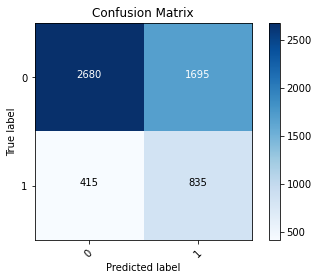

In [143]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()